# Create Initial Conditions That Result in Spiral Defect Chaos
Tim Tyree<br>
6.8.2020

In [1]:
from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.model.LR_model import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.measure.utils_measure_tips_cpu import *
from lib.utils.stack_txt_LR import *
from lib.viewer import *
import trackpy

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [4]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# (deprecated) create spiral defect chaos with the Fenton-Karma model 

In [40]:
# #pylab
# %matplotlib inline
# import numpy as np, pandas as pd, matplotlib.pyplot as plt
# from pylab import imshow, show
# import skimage as sk
# from skimage import measure, filters
# import matplotlib.pyplot as plt, numpy as np, os
# from numba import njit, jit, vectorize
# from PIL import Image
# import imageio
# # import cv2 as cv



# #automate the boring stuff
# from IPython import utils
# import time, os, sys, re
# beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
# if not 'nb_dir' in globals():
#     nb_dir = os.getcwd()
# width = 512
# height = 512
# channel_no = 3

# #load the libraries
# from lib import *
# # from lib.operari import *
# # from lib.ProgressBar import *
# # from lib.minimal_model import *
# # from lib.TexturePlot import *
# # from lib.get_tips import *
# # from lib.intersection import *
# #TODO: use cuda via numba
# # from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# # from lib.contours_to_tips import *

# %autocall 1
# %load_ext autoreload
# %autoreload 2

## (ignore) create a 512x512x3 initial condition that's well controlled and produces SDC

## create a 'time origin' in a simple, controlled way
create a uniform, horizontal stimulus, then time step up to time = 100, at time steps of h = 0.01.  Record.

In [41]:
# make the relevant initial texture
txt = np.zeros((512,512,3))
zero_txt = txt.copy()
txt[256-32:256+32,:,0] = 0.5
txt[...,1] = 0.5
txt[...,2] = 0.5
tme = 0

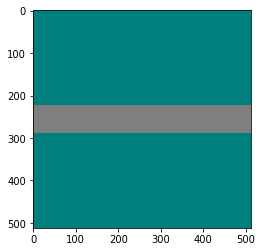

In [42]:
plt.imshow(txt)

In [43]:
h = 0.01
nsteps = 10**4
for step in range(nsteps):
    time_step(texture=txt, h = 0.01, zero_txt=zero_txt)
    tme += h
    printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"the time is tme = {tme}.")

NameError: name 'time_step' is not defined

In [ ]:
save_fn = f"ic_{txt.shape[1]}x{txt.shape[0]}_t={0}.npz"
print(save_fn)
np.savez_compressed(f'{nb_dir}/Data/{save_fn}', txt)

## added a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

### load test cases for pbc

In [ ]:
data_dir = f'{nb_dir}/Data/ic_512x512_t=0.npz'
txt = np.load(data_dir)['arr_0']

In [ ]:
plt.imshow(txt)

## DONE: add a semicircle of stimulus tilted at 45º in the danger zone

In [ ]:
from lib.controller.draw import *

In [ ]:
def get_semicircle(txt,deg,x0,y0):
    #make the initialization mesh
    img = 0*txt[...,0].copy()
    color_left_of_line(out=img, x0=x0, y0=y0, deg = deg, value=1.)  #make left of line mesh 0 or 1
    color_outside_range(out=img, x0=x0,y0=y0,r=64*2, val=0.0)  #make circle mesh 0 or 1
    #already done: hadamard product of the two.
    return img
#make initialization conditions
deg = 45
x0 = 600/4
y0 = 600/2
img=get_semicircle(txt,deg,x0,y0)
plt.imshow(img,vmin=0,vmax=1)

In [ ]:
# save this init + the origin
out = txt.copy()
out[...,0] += 10.*img
plt.imshow(out)

In [ ]:
# save_dir = nb_dir+f'/Data/ic_deg_{deg}_0'
# np.save(save_dir+f'.npy', arr=out)
# np.savez_compressed(save_dir+f'.npz', arr=out)

In [ ]:
save_dir


## off topic: get method from trimesh used to calculate volume

In [ ]:

# from skimage import draw

# circle_coords = draw.circle(r=100, c=100, radius=100, shape=(512,512,3))
# txt[circle_coords]


# compute initial point and final point of line that goes through the circle's center
# r0 = 0; c0 = xm - dst
# r1 = txt.shape[1]-1; c1 = xm + dsb
# draw that circle
# line = draw.line(r0, c0, r1, c1)

# ym = 512/4; xm = 512/2; #same as circle center
# deg   = 45 # number of degrees semicircle is cut by
# theta = deg/180*np.pi

# #dist to top
# dtt = ym
# #dist to bottom
# dtb = txt.shape[1]-ym-1
# #use trig to get dist to sides
# dst = int(np.around(np.tan(theta)*dtt))
# dsb = int(np.around(np.tan(theta)*dtb))


# img = 0*txt[...,0].copy()
# line_x = line[0]
# color_within_range(x0=512/2,y0=512/4,r=100, out=img, val=10., width=512,height=512)


In [ ]:
!pip3 install trimesh

In [ ]:
import trimesh
# from lib.operari import *
# import inspect

In [ ]:
file_name = 'ic_600x600.101.npz'
file_dir = find_files(file_name, search_path=nb_dir)
if len(file_dir)==0: raise('file not found')
# print(
file_dir=file_dir[0]
# )
# print(sys.path.exists(file_dir))

In [ ]:
# generate load_mesh from .npz array
txt = np.load(file_dir)['arr_0']

In [ ]:
# #make a log folder
make_log_folder(folder_name='Data/log-tmp/')

In [ ]:
# print(inspect.getsource(trimesh.creation.faces_to_edges))

In [ ]:
# print(inspect.getsource(trimesh.Trimesh.))
#     trimesh.Trimesh.mass_properties
trimesh.Trimesh.volume

In [ ]:
trimesh.

### move the computational geometry ipynbs and lib from rapids-notebook/'trimesh work' over here to python/notebooks/
Done on UB

## distractions

### TODO(when bored & w/ time): test trimesh.Trimesh.area and trimesh.Trimesh.volume can reproduce the right ratio for a sphere.

### TODO: What sized cube yields a unit volume output? Hint: what's the volume for a right tetrahedron?

### (and then) TODO: find out this "surface integral" that functionaly produces the volume of a watertight triangular mesh

## partition WJ's 600x600 ic into nine 200x200 patches. save
each patch is 5cm x 5 cm<br>
6.23.2020


In [ ]:
input_fn = search_for_file()

In [ ]:
txt = load_buffer(input_fn)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.11.npz'
txt_out = txt[0:200,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.12.npz'
txt_out = txt[200:400,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.13.npz'
txt_out = txt[400:600,0:200]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.21.npz'
txt_out = txt[0:200,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.22.npz'
txt_out = txt[200:400,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.23.npz'
txt_out = txt[400:600,200:400]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.31.npz'
txt_out = txt[0:200,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.32.npz'
txt_out = txt[200:400,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

In [ ]:
save_fn = nb_dir+'/Data/initial-conditions/ic_200x200.101.33.npz'
txt_out = txt[400:600,400:600]
np.savez_compressed(save_fn,txt_out)
print(txt_out.shape)

## file IO method that compresses numpy arrays.  
8.13.2020
- TODO: see whether this compressed array format can store 3 channels of float instances at each pixel

In [ ]:
class IC_File(object):
    r"""Describe the class"""
    def __init__(self, folder, file_name):
        os.chdir(folder)
        f= open(file_name,"ab") #write to binary file: 'wb' ) )
        data = read_array(f)
        self.data = data
        # for i in range(10):
        #   f.write("This is line %d\r\n" % (i+1))
        f.close()
        self.folder = folder
        self.file_name = file_name
        
        self.width = None
        self.height= None
        self.xres = None
        self.yres = None
        
    def shape(self):
        return np.array((self.width,self.height), dtype=np.int)
    def area(self):
        shape = self.shape()
        da = self.xres()*self.yres()
        return da*shape[0]*shape[1]
    
def compress_array(array, save_file='data.pkl.lzma'):
    '''array is a numpy array.'''
    import pickle, gzip, lzma, bz2
    data = array
    # pickle.dump( data, gzip.open( 'data.pkl.gz',   'wb' ) ) # inferior to lzma
    pickle.dump( data, lzma.open( save_file, 'wb' ) )
    # pickle.dump( data,  bz2.open( 'data.pkl.bz2',  'wb' ) ) # inferior to lzma
    
def append_array(array, save_file='data.pkl.lzma'):
    '''array is a numpy array.'''
    import pickle, gzip, lzma, bz2
    data = array
    # pickle.dump( data, gzip.open( 'data.pkl.gz',   'wb' ) ) # inferior to lzma
#     pickle.dump( data, lzma.open( save_file, 'ab' ) ) # slightly smaller file size
    pickle.dump( data,  bz2.open( 'data.pkl.bz2',  'wb' ) ) # better loading speed for non-random numpy arrays

In [ ]:
!pip install hickle

In [ ]:
#consider using a hdf5 file structure to efficiently store numpy arrays using hickle!
import hickle as hkl 

data = { 'name' : 'test', 'data_arr' : [1, 2, 3, 4] }

# Dump data to file
hkl.dump( data, 'new_data_file.hkl' )

# Load data from file
data2 = hkl.load( 'new_data_file.hkl' )

print( data == data2 )

There also is the possibility to "pickle" directly into a compressed archive by doing:

In [ ]:
folder = fi

### TODO: use dask to load/write these files (check chrome!)

## partition WJ's 600x600 ic into nine 200x200 patches. save
each patch is 5cm x 5 cm<br>
6.23.2020


In [ ]:
# def load_fortran(input_fn):
#     #load txt
#     arr = np.loadtxt(input_fn)
#     #WJ's files come to 16 digits of machine precision.
#     arr = arr.astype(dtype = np.float64, casting='same_kind', order='C', copy=False)

#     N = arr.shape[0]
#     n = np.sqrt(N)
#     if not n == np.int(n):
#         raise Exception('Error: Input array is not a square matrix!')
#     n = int(n)
#     arr = arr.reshape(n,n,arr.shape[-1], order='C')
#     return arr

In [ ]:
# def _precision(arr):
#     val = arr[0,0]
#     return ( precision := len(str(val))-2 )
# def _dtype(arr):
#     val = arr[0,0]
#     return ( dtype := type(val) )

In [ ]:
input_fn = search_for_file()

In [ ]:
#TODO: test that the input_fn is given as the absolute file path and fix it if it isn't
base_folder = '/'+os.path.join(*input_fn.split('/')[:-2])#+'/ds_5_param_set_8/trajectories/'


precision = _precision(arr)
dtype = _dtype(arr)

# val = arr[0,0]
# arr = arr.astype(dtype = np.float16, casting='same_kind', order='F', copy=False)

os.chdir(tmp_folder)
tmp_fn = file_name+'.npz'
# np.savez_compressed(tmp_fn,arr)
# txt = load_buffer(tmp_fn)
txt = arr

# sub_id = 33
# initial_condition_dir = nb_dir + f'/Data/initial-conditions/ic_200x200.101.{sub_id}.npz'
tip_position_dir = tip_log_dir.replace('.csv','_processed.csv')
save_folder_traj = '/'+os.path.join(*initial_condition_dir.split('/')[:-2])+'/ds_5_param_set_8/trajectories/'
birth_death_dir = '/'.join(save_folder_traj.split('/')[:-2])+'/birth-death-rates'


In [ ]:
# def chunk_600x600_into_ninths(txt,file_name, save_folder):
#     '''suppose file_name is a bare string with no extension such as ".npz"
#     suppose txt is a numpy array that is (600,600,The_Rest)
#     '''
#     os.chdir(save_folder)
#     save_fn = file_name+'.11.npz'
#     txt_out = txt[0:200,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.12.npz'
#     txt_out = txt[200:400,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.13.npz'
#     txt_out = txt[400:600,0:200]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.21.npz'
#     txt_out = txt[0:200,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.22.npz'
#     txt_out = txt[200:400,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.23.npz'
#     txt_out = txt[400:600,200:400]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.31.npz'
#     txt_out = txt[0:200,400:600]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.32.npz'
#     txt_out = txt[200:400,400:600]
#     np.savez_compressed(save_fn,txt_out)

#     save_fn = file_name+'.33.npz'
#     txt_out = txt[400:600,400:600]
#     np.savez_compressed(save_fn,txt_out)
#     return True

## functionally convert one of WJ's 600x600 ic_files into nine 200x200 ic_files
each patch is 5cm x 5 cm<br>
8.13.2020


In [ ]:
chunk_600x600_into_ninths(txt=arr,file_name=file_name.replace('600','200'), save_folder=save_folder)

In [ ]:
os.system('ls')

In [ ]:
#list all files in the cwd
file_list = os.listdir()
in_fn = file_list[0]

In [ ]:
#load a .npz file
txt = load_buffer(in_fn)

In [ ]:
def parse_input_fn(input_fn):
    '''file_name, input_folder, output_folder, tmp_folder = parse_input_fn(input_fn)
    changes to input_folder in the local scope.'''
    file_name     = input_fn.split('/')[-1]
    input_folder  = '/'+os.path.join(*input_fn.split('/')[:-1])
    os.chdir(input_folder)
    if not os.path.isabs(input_folder):
        input_folder = os.getcwd()
    base_folder   = '/'+os.path.join(*input_folder.split('/')[:-1])
    tmp_folder    = base_folder+'/ic-tmp'
    output_folder = base_folder+'/ic-in'
    return file_name, input_folder, output_folder, tmp_folder

# Create Initial Conditions That Result in Spiral Defect Chaos for the Luo-Rudy model
Tim Tyree<br>
1.15.2021

## initialize a 600x600 square computational domain with the correct number of channels and as repolarized excitable myocardial tissue

In [6]:
def get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4):
    zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
    zero_c6=np.zeros(shape=(width,height,6), dtype=np.float64, order='C')
    #allocate memory to texture
    inVc=zero_c2.copy()
    inVc[...,0]+=V_initial
    inVc[...,1]+=Ca_i_initial
    outVc=inVc.copy()
    inmhjdfx=zero_c6.copy()
    #open the gates that are open at equilibrium at the resting potential (h, j, f)
    inmhjdfx[...,1]=1.
    inmhjdfx[...,2]=1.
    inmhjdfx[...,4]=1.
    outmhjdfx=inmhjdfx.copy()
    dVcdt=zero_c2.copy()
    txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    return txt

In [27]:

#(not terribly useful) get the forward integrate kernel
# forward_integrate_kernel= get_forward_integrate_kernel(nb_dir,dt,width,height,ds,diffCoef=0.001,Cm=1.)

In [44]:
width=600
height=600
ds=15.0
dt,one_step_map=get_one_step_map(
    nb_dir,
    dt=0.1,
    width=width,height=height,ds=ds,
    diffCoef=0.001,dsdpixel=ds/width,
    Cm=1.0,
)
txt= get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)


### DONE: test - time step a number of times and verify that nothing happens

In [45]:
txt_prv=txt.copy()
for n in range(50):
    one_step_map(txt,txt_Istim_none)
txt_nxt=txt.copy()

In [46]:
delta_txt=txt_nxt-txt_prv

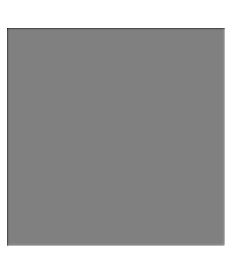

In [47]:
chnl=17
img=delta_txt[...,chnl]
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}',c='w',fontsize=22)
plt.show()

In [48]:
print('max absolute differences between input and output, by channel')
for chnl in range(18):
    img=delta_txt[...,chnl]
    print(np.max(np.abs(img)))

max absolute differences between input and output, by channel
0.17058908051171784
5.911731792321352e-05
0.17058908051171784
5.911731792321352e-05
0.0015897566525638032
0.011720206585876913
0.0026551348863671498
0.0013412403736155108
1.5857819731790457e-06
0.00012010460821383368
0.0015897566525638032
0.011720206585876913
0.0026551348863671498
0.0013412403736155108
1.5857819731790457e-06
0.00012010460821383368
0.013434385876903857
9.853964442275635e-06


# define txt_Istim textures that give a line stimulus of constant electric flux


In [79]:
chnlno=2+2+6+6+2
# txt= get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)
width=600;height=600
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
zero_c6=np.zeros(shape=(width,height,6), dtype=np.float64, order='C')
print(f"# of channels is {chnlno}.")

mag=-10
txt_Istim=zero_c2[...,0].copy()
txt_Istim[:,:5]=mag
txt_Istim_left=txt_Istim.copy()

mag=-10
txt_Istim=zero_c2[...,0].copy()
txt_Istim[300:305,:]=mag
txt_Istim_top=txt_Istim.copy()

txt_Istim_none=zero_c2[...,0].copy()

# of channels is 18.


In [81]:
#make initialization conditions for a semicircular stimulus on the left
deg = 45
x0 = 600/4
y0 = 600/2
mag=-10
from lib.controller.draw import *

txt_Istim=get_semicircle(zero_c2,deg,x0,y0)
txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()

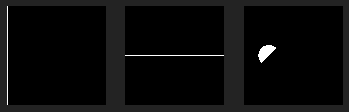

In [82]:
fig,axs=plt.subplots(ncols=3,figsize=(6,9))
ax=axs[0]
ax.imshow(-txt_Istim_left,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
ax=axs[1]
ax.imshow(-txt_Istim_top,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
ax=axs[2]
ax.imshow(-txt_Istim_semi,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
plt.show()

# (ignore) dev CUDA

## (working brainwarmer) compute the coordinate textures using numba.cuda.jit

In [ ]:
txt=get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)
t=0.

#test onestep methods
kernelA(txt,txt_Istim_left)
kernelB(txt,txt_Istim_left)

In [ ]:
import numba.cuda as cuda
from lib.controller.one_step_splitting_cuda_kernels import *


In [ ]:
@cuda.jit('void(int32[:], int32[:], int32[:,:])')
def foo(aryA, aryB,aryC):
    for n,A in enumerate(aryA):
        for m,B in enumerate(aryB):
            aryC[n,m]=A+B

griddim = 100, 2
blockdim = 3, 3
width=600
height=600
aryA=np.zeros(width,dtype=np.int32)
aryB=np.arange(height)#np.zeros(height,dtype=np.float64)
ndim=aryA.shape[0]
mdim=aryB.shape[0]
aryC=np.zeros(shape=(ndim,mdim),dtype=np.int32)

foo[griddim, blockdim](aryA, aryB, aryC)
xcoord=aryC.copy()
foo[griddim, blockdim](aryB, aryA, aryC)
ycoord=aryC.copy()



# one_step_kernel=cuda.jit(one_step_map_w_Istim)

In [ ]:
foo[griddim, blockdim](aryB, aryA, aryC)


In [ ]:
bpg = 50
tpb = 32
n = bpg * tpb

@cuda.jit('(float32[:,:], float32[:,:], float32[:,:])', target='gpu')
def cu_square_matrix_mul(A, B, C):
    sA = cuda.shared.array(shape=(tpb, tpb), dtype=float32)
    sB = cuda.shared.array(shape=(tpb, tpb), dtype=float32)

    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    bx = cuda.blockIdx.x
    by = cuda.blockIdx.y
    bw = cuda.blockDim.x
    bh = cuda.blockDim.y

    x = tx + bx * bw
    y = ty + by * bh

    acc = 0.
    for i in range(bpg):
        if x < n and y < n:
            sA[ty, tx] = A[y, tx + i * tpb]
            sB[ty, tx] = B[ty + i * tpb, x]

        cuda.syncthreads()

        if x < n and y < n:
            for j in range(tpb):
                acc += sA[ty, j] * sB[j, tx]

        cuda.syncthreads()

    if x < n and y < n:
        C[y, x] = acc

In [ ]:
O=np.ones((4,4))
out=O.copy()
cu_square_matrix_mul(O, O, out)

## use cuda.grid?
source:

https://towardsdatascience.com/better-parallelization-with-numba-3a41ca69452e

In [ ]:
@cuda.jit
def get_nearby_kernel(coord1, coord2, max_dist, out):
    start = cuda.grid(1)
    stride = cuda.gridsize(1)
    lat_filter = max_dist / 100
    
    for i in range(start, coord1.shape[0], stride):
        ct = 0
        _lat1 = coord1[i,0]
        _lng1 = coord1[i,1]
        
        for j in range(coord2.shape[0]):
            _lat2 = coord2[j,0]
            _lng2 = coord2[j,1]
            # escape condition if latitudes are too far apart
            if math.fabs(_lat1 - _lat2) <= lat_filter:
                dist = haversine_cuda(_lat1, _lng1, _lat2, _lng2)
                if dist < max_dist:ct += 1
                
        out[i] = ct

## (not working) waste a horrid amount of time trying to GPU accelerate a working CPU kernel.  Idiot.
test a new one_step_kernel that adds the input Istim to Iion
- TODO(later): accelerate ^this with CUDA

In [ ]:
from lib.controller.one_step_splitting_kernels import *
from numba import cuda
print ( cuda.is_available() )
print ( cuda.detect() )

In [ ]:
#initialize txt
txt=get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)
t=0.

In [ ]:
#multiple streams should have a common context
# drv=cuda.driver.Driver()
# drv.initialize()
# handle=drv.pop_active_context()
# stream=ctx.create_stream()

In [ ]:
d_txt=cuda.to_device(txt,stream=stream)
d_txt_Istim_left=cuda.to_device(txt_Istim_left,stream=stream)

griddim = 100, 3
blockdim = 3, 3
stream=cuda.stream()
sharedmem=10*(d_txt.size+d_txt_Istim_left.size)


In [ ]:
# forward_integrate_kernel= get_forward_integrate_kernel(nb_dir,dt,width,height,ds,stream,diffCoef=0.001,Cm=1.)


In [ ]:
# nsteps=1000
# forward_integrate_kernel[griddim, blockdim, stream, sharedmem](d_txt,d_txt_Istim_left,nsteps)

# retval=d_txt.to_host()
# cuda.close()


In [ ]:
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds,stream)

In [ ]:
# forward_integrate_kernel=get_forward_integrate_kernel(kernelA, kernelB, griddim = (3, 3), blockdim = (3, 3))
get_one_step_map_w_Istim(nb_dir,dt)

In [ ]:
# take 1000 time steps to 100ms
num_steps=1000#000
update_every=100
step_count=0
for n in range(num_steps):
    
#     kernelA[griddim, blockdim, stream, sharedmem](d_txt,d_txt_Istim_left)
#     cuda.syncthreads()
#     cuda.synchronize()

#     kernelB[griddim, blockdim, stream, sharedmem](d_txt,d_txt_Istim_left)
#     cuda.syncthreads()
#     cuda.synchronize()

    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)
print(f"the final time is t = {t} ms.")

In [ ]:
txt=d_txt.to_host()
# txt


In [ ]:
# kernelB[griddim, blockdim](d_txt,d_txt_Istim_left)
d_txt.to_host()

In [ ]:
# cuda.close()
d_txt

In [ ]:
chnl=17
img=txt[...,chnl]
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}',c='w',fontsize=22)
plt.show()

In [ ]:
# take 1000 time steps to 100ms
numsteps=1000
update_every=100
step_count=0
for n in range(numsteps):
    kernelA(txt,txt_Istim_left)
    kernelB(txt,txt_Istim_left)
    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)

In [ ]:
# txt[0,0,:18].shape
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim__cuda_kernel(nb_dir,dt,width,height,ds,stream)

In [ ]:
# @cuda.jit('void(float64[:,:,:], float64[:,:])')
# def one_step_kernel(txt,txt_Istim_left):
#     kernelA(txt,txt_Istim_left)
#     kernelB(txt,txt_Istim_left)

In [ ]:
# #take 1000 time steps to 100ms, stimulating onthe left
# tf=100
# num_steps=int(tf/dt)
# t+=dt*num_steps
# forward_integrate_kernel(txt,txt_Istim_left,num_steps)
# beep(3)
# t+=dt*num_steps

# (success!) Generate a stable spiral wave using cross-stimulation for the LR model

In [83]:
ic_folder=f"{nb_dir}/Data/initial-conditions-suite-3-LR"
if not os.path.exists(ic_folder):
    os.mkdir(ic_folder)

In [94]:
width=600 #width of domain in pixels
height=600 #height of domain in pixels
ds=15.0 #width of domain in centimeters

#initialize txt
# V_initial=-85.
# Ca_i_initial = 2*10**-4
txt=get_blank_txt_LR(width,height,V_initial=-84.66,Ca_i_initial = 1.45E-007)
t=0.

#get time steps
from lib.model.LR_model_optimized_w_Istim import *
#get the onestep kernels
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [95]:
#stimulate on the left
tf=10.
num_steps=int(tf/dt)
txt_Istim=txt_Istim_left.copy()
update_every=10
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)
txt_a1=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 10.0 ms.



26.27114464264114


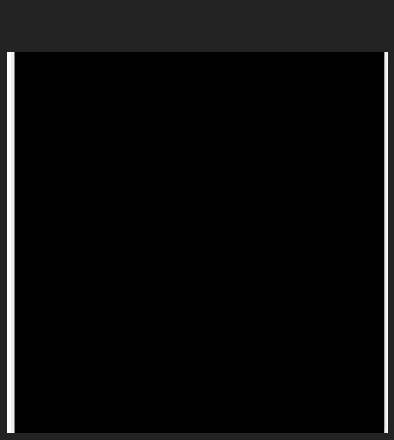

In [96]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt_a1[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [97]:
#integrate without stimulation
# txt=txt_a.copy()
tf=200
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=10
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        printProgressBar(step_count,num_steps)
txt_a2=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 200.0 ms.



-5.595954622589906


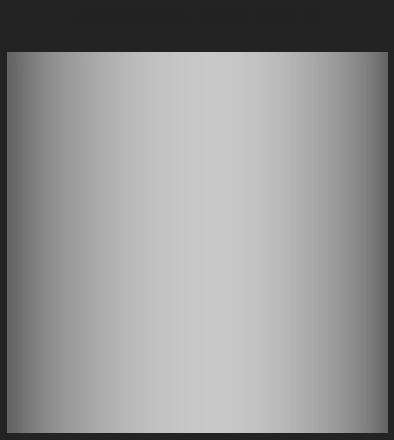

In [98]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
ta2=t#110
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [99]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/txt_a2.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [92]:
#load the buffer loaded
t=200.
img_fn=f'{nb_dir}/Data/initial-conditions-suite-3-LR/txt_a2.npz'
txt=load_buffer(img_fn)[0]
txt.shape

(600, 600, 18)

-5.595954622589906


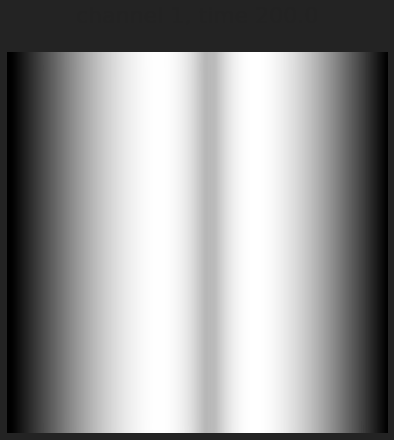

In [100]:
#Visualize the buffer (plain)
chnl=1
print(np.max(txt[...,0]))
ta2=t#110
img=txt[...,chnl]
if chnl==0:
    plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
else:
    plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()


In [ ]:
dt

In [101]:
#integrate without stimulation
# t=130
# txt=txt_a2.copy()
tf=75#150
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=1
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
#         printProgressBar(step_count,num_steps)
txt_a3=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)



the final time is t = 275.0 ms.



-15.491384451013706


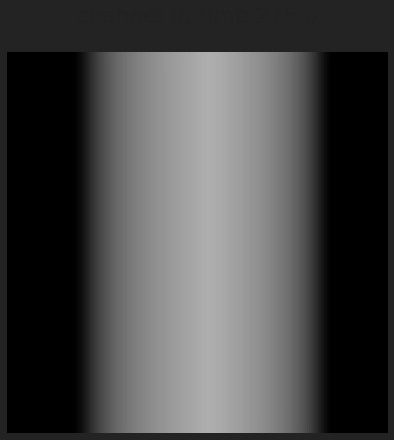

In [102]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
ta3=t#110
img=txt[...,chnl]
if chnl==0:
    plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
else:
    plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}, time {ta3:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [103]:
# #define the top stimulation width (wag) and magnitude (mag)
# mag=-10#1.77#-10#-3.
# wag=5
# zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
# txt_Istim=zero_c2[...,0].copy()
# txt_Istim[300:300+wag,:300]=mag
# txt_Istim_top=txt_Istim.copy()

In [104]:
dt=0.01
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [105]:
#take 1000 time steps to 100ms, stimulating on the with a semicircle #top/horizontally
tf=10#.100#10
# t=130
# txt=txt_a3.copy()
# txt=txt_a2.copy()
num_steps=int(tf/dt)
# txt_Istim=txt_Istim_semi/copy()#txt_Istim_top.copy()
txt_Istim=txt_Istim_top.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
#     step_count+=1
#     if step_count%update_every==0:
t+=dt*num_steps#update_every
#         printProgressBar(step_count,num_steps)
print(f"\nthe final time is t = {t:.1f} ms.")
txt_b=txt.copy()
# beep(1)


the final time is t = 285.0 ms.


22.124624250125606


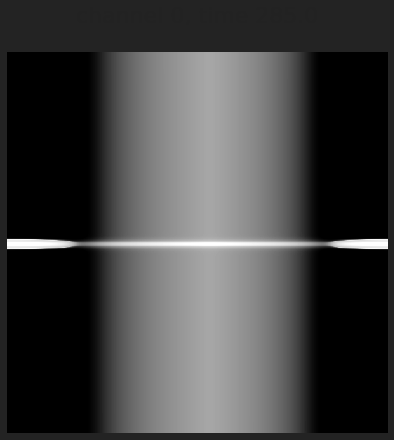

In [106]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt_b[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [107]:
dt=0.1
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [108]:
beep(7)

0

In [109]:
#take 10000 time steps forward 1 sec without stimulation
tf=1000
# t=170
txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
        #compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 1285.0000000000011 ms.


0

In [110]:
#10s after second shock, at time t=12 seconds
txt_1=txt.copy()
t

1285.0000000000011

1285.0000000000011


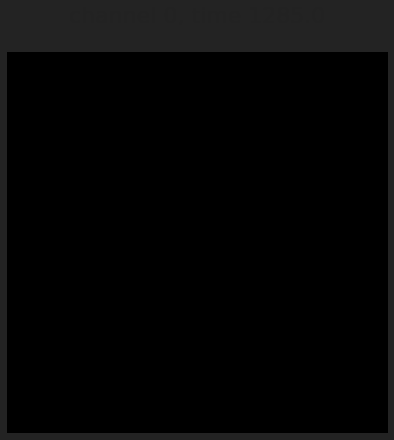

In [111]:
#Visualize the buffer (plain)
chnl=0
print(t)
img=txt_1[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=False
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/txt_1.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
#load the buffer loaded
t=385.
img_fn=f'{nb_dir}/Data/initial-conditions-suite-3-LR/txt_1.npz'
txt=load_buffer(img_fn)[0]
txt.shape

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=1000
# txt=txt_b.copy()
num_steps=int(tf/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
#     if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
#         printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(1)

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic600x600_tt/ic001.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
beep(10)

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=2000
# txt=txt_b.copy()
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=50
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
#     if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
#         printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(10)

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic600x600_tt/ic001.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

# observe apparent spiral tips

### Show all spiral tips present


In [ ]:
#compute all spiral tips present
V_threshold=25.#mV
level1=V_threshold
# theta_threshold=0.
level2=0.
#take the first step
one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
t+=dt
img=inVc[...,0]
dimgdt=dVcdt[...,0]
width=200;height=200
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2,width=width,height=height)
dict_out_instantaneous=dict_out
print(np.max(inVc[...,0]))

In [ ]:
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['v'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
plt.show(fig)

In [ ]:
#save texture at this time t
save=False
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/test_data/test_txt_LR_euler_t_{int(t)}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

### generate some spiral tips

In [ ]:
dt, arr39, one_step_method = get_one_step_explicit_synchronous_splitting(nb_dir,dt)
print(get_one_step_explicit_synchronous_splitting)

In [ ]:
#forward euler explicit synchronous integration
tf=1000.
tmax=tf
save_every_n_frames=10.
V_threshold=25.#mV0.#-37.#mV
level1=V_threshold; level2=0.
num_steps=int(tf/dt)
step_count=0
n_tips_lst=[];t_lst=[];dict_out_lst=[]
save_dict_every=100
n_tips=1
while (t<tmax) & (n_tips > 0):
    if step_count%save_every_n_frames != 0:
        #forward Euler integration in time
        txt=one_step_map(txt)
    else:   

        #compute tip locations in dict_out
        #update texture namespace
        inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
        txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        img=inVc[...,0]
        dimgdt=dVcdt[...,0]
        dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)

        #save tip data
        n_tips=dict_out['n']
        n_tips_lst.append(n_tips)
        t_lst.append(t)
        #         if count%save_dict_every==0:
        dict_out_lst.append(dict_out)
    
        #integrate by dt
        txt=one_step_map(txt)
    t+=dt
    step_count+=1
    printProgressBar(step_count,num_steps)
    if n_tips==0:
        print(f"zero tips remaining at time t={t}!")
        break
beep(3)

## scratchwerk

### TODO(later maybe): apply the dormand-prince one_step method.  
- how does it's runtime compare?
- how does the quality of results compare?
- note: the time step is already 0.1 ms, and the one_step is at least second order accurate.

### Scrum 1.20.2021

DONE generate spiral waves for the LR model
- DONE 6: carefully compare pbc implemented in LR model to FK model.
- (ignore) further options
    - option 1: scrutinize why my AP looks slightly different from WJ's (might be floating point arith. error... maybe
        - try arr39.astype(np.float32) and comparing
    - __option 3: modify my verified pycuda kernel for the FK model to use Iion from the LR model.__
    - option 4: try using forward euler method instead of the fancy splitting method
    - option 5: try using a 9 point stencil
- TODO: Try a semicircle stimulus at the repolarized zone

# Tile ic001 9 times, stimulate it randomly, run it for awhile, and save for later chunking
1.20.2021

In [ ]:
from lib.controller.draw import *
from lib.model.LR_model_optimized_w_Istim import *

from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.model.LR_model import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.measure.utils_measure_tips_cpu import *
from lib.utils.stack_txt_LR import *
from lib.viewer import *
import trackpy
import random
%autocall 1
%load_ext autoreload
%autoreload 2

In [ ]:
#load the buffer loaded
t=0.
img_fn=f'{nb_dir}/Data/initial-conditions-suite-3-LR/ic600x600_tt/ic001.npz'
txt_in=load_buffer(img_fn)[0]
txt=np.tile(txt_in,(3,3,1))
txt.shape

In [ ]:
#make null stimulus
width,height,chnlno=txt.shape
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
txt_Istim_none=zero_c2[...,0].copy()

#randomly place semicircular stimuli
random.seed(100)
num_semi=7
mag=-10

txt_Istim=txt_Istim_none.copy()
for n in range(num_semi):
    x0=random.uniform(0,1)*width
    y0=random.uniform(0,1)*height
    deg=random.uniform(0,1)*360
    txt_Istim+=get_semicircle(txt,deg,x0,y0)

txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()

In [ ]:
#Visualize the buffer (plain)
chnl=0
# print(np.max(txt[...,0]))
img=txt_Istim_semi#txt[...,chnl]
plt.imshow(img,cmap='gray')#,vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#get the onestep kernels
ds=45.;dt=0.1
dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [ ]:
#semicircular stimulation
tf=10
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_semi.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(10)

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
200*0.04


In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=400
# txt=txt_b.copy()
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe number of steps taken is step_count = {step_count}.")
# beep(10)
dt

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic1800x1800_t_{t:.0f}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
#make null stimulus
width,height,chnlno=txt.shape
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
txt_Istim_none=zero_c2[...,0].copy()

#randomly place semicircular stimulus
random.seed(108)#101)#104)#
num_semi=7
mag=-10

txt_Istim=txt_Istim_none.copy()
for n in range(num_semi):
    x0=random.uniform(0,1)*width
    y0=random.uniform(0,1)*height
    deg=random.uniform(0,1)*360
    txt_Istim+=get_semicircle(txt,deg,x0,y0)

txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()
# #Visualize the buffer (plain)
# chnl=0
# # print(np.max(txt[...,0]))
# img=txt_Istim_semi#txt[...,chnl]
# plt.imshow(img,cmap='gray')#,vmin=-80, vmax=15)
# plt.axis('off')
# # plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
# plt.show()

In [ ]:
#semicircular stimulation
tf=10
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_semi.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
# beep(10)

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=800
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe number of steps taken is step_count = {step_count}.")
# beep(10)
dt

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic1800x1800_t_{t:.0f}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#make null stimulus
width,height,chnlno=txt.shape
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
txt_Istim_none=zero_c2[...,0].copy()

#randomly place semicircular stimulus
random.seed(104)#108)#101)#
num_semi=7
mag=-10

txt_Istim=txt_Istim_none.copy()
for n in range(num_semi):
    x0=random.uniform(0,1)*width
    y0=random.uniform(0,1)*height
    deg=random.uniform(0,1)*360
    txt_Istim+=get_semicircle(txt,deg,x0,y0)
txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()
# #Visualize the buffer (plain)
# chnl=0
# # print(np.max(txt[...,0]))
# img=txt_Istim_semi#txt[...,chnl]
# plt.imshow(img,cmap='gray')#,vmin=-80, vmax=15)
# plt.axis('off')
# # plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
# plt.show()

In [ ]:
#semicircular stimulation
tf=10
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_semi.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
# beep(10)

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=800
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe number of steps taken is step_count = {step_count}.")
# beep(10)
dt

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic1800x1800_t_{t:.0f}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#make null stimulus
width,height,chnlno=txt.shape
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
txt_Istim_none=zero_c2[...,0].copy()

#randomly place semicircular stimulus
random.seed(101)#104)#108)#
num_semi=7
mag=-10

txt_Istim=txt_Istim_none.copy()
for n in range(num_semi):
    x0=random.uniform(0,1)*width
    y0=random.uniform(0,1)*height
    deg=random.uniform(0,1)*360
    txt_Istim+=get_semicircle(txt,deg,x0,y0)

txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()
# #Visualize the buffer (plain)
# chnl=0
# # print(np.max(txt[...,0]))
# img=txt_Istim_semi#txt[...,chnl]
# plt.imshow(img,cmap='gray')#,vmin=-80, vmax=15)
# plt.axis('off')
# # plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
# plt.show()

In [ ]:
#semicircular stimulation
tf=10
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_semi.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
# beep(10)

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=800
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe number of steps taken is step_count = {step_count}.")
# beep(10)
dt

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic1800x1800_t_{t:.0f}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

Now, chunk ^these into 200x200 regions, and verify that each one contains spiral tips!

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic1800x1800_t_{t:.0f}_tiny.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt.astype('float16')])

In [ ]:
save_img_fn

In [ ]:
# #load the tiny buffer and verify it is still looks reasonable when compressing to float16.  Let's use float32
# img_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ic1800x1800_t_2830_tiny.npz'
# # img_fn=f'{nb_dir}/Data/initial-conditions-suite-3-LR/ic600x600_tt/ic001.npz'
# txt_tiny=load_buffer(img_fn)[0]
# # #Visualize the buffer (plain)
# # print(np.max(txt_tiny[...,0]))
# # img=txt_tiny.astype('float32')[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
# # mn=np.min(img[...,0]);mx=np.max(img[...,0])
# # img[...,0]=(img[...,0]-mn)/(mx-mn)
# # # mn=np.min(img[...,1]);mx=np.max(img[...,1])
# # # img[...,1]=(img[...,1]-mn)/(mx-mn)
# # mn=np.min(img[...,2]);mx=np.max(img[...,2])
# # img[...,2]=(img[...,2]-mn)/(mx-mn)
# # plt.subplots(figsize=(9,9))
# # plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
# # plt.axis('off')
# # # plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
# # plt.show()
# txt_tiny[0,0,6]

In [ ]:
img_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ic1800x1800_t_2830.npz'
t=2830
# img_fn=f'{nb_dir}/Data/initial-conditions-suite-3-LR/ic600x600_tt/ic001.npz'
txt=load_buffer(img_fn)[0]
txt.shape

In [ ]:
#make null stimulus
width,height,chnlno=txt.shape
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
txt_Istim_none=zero_c2[...,0].copy()

#randomly place semicircular stimulus
random.seed(1011)#101)#104)#
num_semi=7
mag=-10

txt_Istim=txt_Istim_none.copy()
for n in range(num_semi):
    x0=random.uniform(0,1)*width
    y0=random.uniform(0,1)*height
    deg=random.uniform(0,1)*360
    txt_Istim+=get_semicircle(txt,deg,x0,y0)

txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()
# #Visualize the buffer (plain)
# chnl=0
# # print(np.max(txt[...,0]))
# img=txt_Istim_semi#txt[...,chnl]
# plt.imshow(img,cmap='gray')#,vmin=-80, vmax=15)
# plt.axis('off')
# # plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
# plt.show()

In [ ]:
#semicircular stimulation
tf=10
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_semi.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
# beep(10)

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=800
# txt=txt_b.copy()
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe number of steps taken is step_count = {step_count}.")
beep(10)

In [ ]:
#Visualize the buffer (plain)
print(np.max(txt[...,0]))
img=txt[...,(0,-2,1)].copy()#chnl]#0,1,V,Ca_i,INa,IK
mn=np.min(img[...,0]);mx=np.max(img[...,0])
img[...,0]=(img[...,0]-mn)/(mx-mn)
# mn=np.min(img[...,1]);mx=np.max(img[...,1])
# img[...,1]=(img[...,1]-mn)/(mx-mn)
mn=np.min(img[...,2]);mx=np.max(img[...,2])
img[...,2]=(img[...,2]-mn)/(mx-mn)
plt.subplots(figsize=(9,9))
plt.imshow(img)#,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
# plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic1800x1800_t_{t:.0f}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])#.astype('float16')])

# check if spiral tips are present

In [2]:
ic_fn_lst=[
    "ic018.13.npz",
    "ic008.23.npz",
    "ic017.13.npz",
    "ic005.11.npz",
    "ic013.12.npz",
    "ic011.12.npz",
    "ic007.22.npz",
    "ic012.32.npz",
    "ic007.33.npz",
    "ic014.11.npz",
    "ic013.22.npz",
    "ic017.11.npz",
    "ic009.21.npz",
    "ic007.12.npz"
]

In [ ]:
# input_file_name="ic007.12.npz"
input_folder=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out"
os.chdir(input_folder)
not_reasonable_lst=[]
num_todo=1
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
for input_file_name in ic_fn_lst[:num_todo]:
    txt=load_buffer(input_file_name)

    #test the V_threshold value
    V_threshold=-60.
    level1 = V_threshold
    t=-999
    level2 = 0.
    inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
    img=inVc[...,0]
    dimgdt=dVcdt[...,0]
    dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
    print(len(list(dict_out['x'])))
    fig=show_buffer_LR(txt,figsize=(3,3))
    axs=fig.get_axes()
    ax=axs[0]
    ax.scatter(dict_out['x'],dict_out['y'],s=150,c='yellow',marker='*')
    plt.show()
    retval=input(f"is_reasonable? (enter y/n)")
    if retval[0]!='y':
        not_reasonable_lst.append(input_file_name)
    plt.close()

In [ ]:
print(not_reasonable_lst)

In [4]:
input_folder=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in"
os.chdir(input_folder)
input_file_name='ic005.11.npz'
# txt=load_buffer('ic017.11.npz')#test the V_threshold value
# V_threshold=-50#all okay-60.#-50.#-40
txt=load_buffer(input_file_name)#test the V_threshold value
V_threshold=-60

level1 = V_threshold
t=-999
level2 = 0.
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
print(len(list(dict_out['x'])))
fig=show_buffer_LR(txt,figsize=(3,3))
axs=fig.get_axes()
ax=axs[0]
ax.scatter(dict_out['x'],dict_out['y'],s=150,c='yellow',marker='*')
plt.show()

NameError: name 'compute_all_spiral_tips' is not defined

# __confirmed__ the tip generating routine has been not getting spiral tips for simulations that contain spiral tips.


# (ignore) scratchwerk/routine dev

In [41]:
tmin_early_stopping=100
V_threshold=-30.
tmax=1.
h = 0.1
dt=h
level1 = V_threshold
level2 = 0.
printing=True
kwargs={}
input_folder=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in"
os.chdir(input_folder)
input_file_name='ic005.11.npz'
initial_condition_dir=input_file_name


#initialize records
t = 0.
dict_out_lst = []
num_steps = int(np.around((tmax)/dt))
#initialize simulation
txt=load_buffer(initial_condition_dir)#, Ca_i_initial = Ca_i_initial, Vmax = Vmax, Vmin = Vmin)
width, height, channel_no = txt.shape
kwargs.update({'width':width,'height':height})
#allocate memory
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
#reformate texture
txt_ic=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
assert(np.isclose((txt_ic[0,0,:]-txt[0,0,:]),0.).all())
#get one_step method (performs precomputing)
dt=h#smaller step for first 100 steps (bc of pbc)
dt, one_step_map = get_one_step_map(nb_dir,dt)

if printing:
    print(f"integrating to time t={tmin_early_stopping:.3f} ms without recording with dt={dt:.3f} ms.")
while (t<tmin_early_stopping):
    txt=one_step_map(txt)
    t+=dt
#precompute anything that needs precomputing
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)

# dt, one_step_map = get_one_step_map(nb_dir,dt)
#check for any tips being present
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
n_tips=dict_out['n']#skip this trial if no spiral tips are present
if n_tips==0:
    dict_out_lst.append(dict_out)

integrating to time t=100.000 ms without recording with dt=0.100 ms.


In [42]:
beep(10)
get_one_step_map

<function lib.controller.controller_LR.get_one_step_map(nb_dir, dt, **kwargs)>

In [26]:
print(f"it is {np.isnan(txt.flatten()).any()} that any nan values are in txt.")
assert(not np.isnan(txt.flatten()).any())

it is False that any nan values are in txt.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


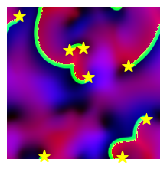

In [43]:
#test the V_threshold value
V_threshold=-50.
level1 = V_threshold
level2 = 0.
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
print(len(list(dict_out['x'])))
fig=show_buffer_LR(txt,figsize=(3,3))
axs=fig.get_axes()
ax=axs[0]
ax.scatter(dict_out['x'],dict_out['y'],s=150,c='yellow',marker='*')
plt.show()

In [37]:
os.chdir(f"{nb_dir}/lib/model/lookup_tables")
table_fn=f"luo_rudy_dt_{dt}_arr39.csv"
arrr39=pd.read_csv(table_fn,header=None).values

In [57]:
#TODO: drop  'theta'  from dict_out throroughly in the tip feature measurement functions

In [58]:
# if printing:
#     #print(f"sigma is {sigma}, threshold is {threshold}.")
#     #print(f"pad is {pad}, rejection_distance is edge_tolerance is {edge_tolerance}.")
#     print(f"integrating to no later than time t={tmax:.3f} milliseconds. ms with recording with dt={dt:.3f} ms.")
# if timing:
#     start = time.time()

In [61]:
#TODO: step through the rest of the routine
##########################################
#run the simulation, measuring regularly
##########################################
tmax=20
save_every_n_frames=10
logging=True
# printing=True
step_count = 0

while (t<tmax) & (n_tips > 0):
    if step_count%save_every_n_frames == 0:
        #compute tip locations in dict_out
        inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
        img=inVc[...,0]
        dimgdt=dVcdt[...,0]
        dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)

        #save tip data
        n_tips=dict_out['n']
        # n_tips_lst.append(n_tips)
        # t_lst.append(t)
        dict_out_lst.append(dict_out)

#         #update progress bar after each measurement
#         if not logging:
#             if printing:
#                 printProgressBar(step_count, num_steps, prefix = 'Progress:', suffix = 'Complete', length = 50)

    #forward Euler integration in time
    txt=one_step_map(txt)
    #advance time by one step
    t   += dt
    step_count += 1


In [81]:
len(dict_out_lst)

741

In [98]:
# confirmed: dict_out_lst looks reasonable

integrating by Delta_t=10 ms takes 11 seconds of runtime with saving 1 time per millisecond<br>


In [64]:
#TODO: make tip detection version that compares txt to txt_old, with save_every_frame=20 #once per 2 ms at the same level, V_threshold

100.0

In [67]:
#TODO: run the rest of the routine step by step

In [105]:
saving=True
data_dir_log='../test_out.csv'
round_output_decimals=1
if printing:
    #report the bottom line up front
    if n_tips==0:
        print(f"zero tips remaining at time t = {t:.1f} ms.")
if printing:
    if t >= tmax:
        print( f"Caution! max_time was reached! Termination time not reached!  Consider rerunning with greater max_time!")
if saving:
    df = pd.concat([pd.DataFrame(dict_out) for dict_out in dict_out_lst])
    df.reset_index(inplace=True, drop=True)
    if df.size>0:#if any spiral tips have been observed
        #if the end of AF was indeed reachded, append a row recording this
        if n_tips==0:
            next_id = df.index.values[-1]+1
            df = pd.concat([df,pd.DataFrame({'t': float(save_every_n_frames*h+t),'n': int(n_tips)}, index = [next_id])])
        #save the recorded data
        df.round(round_output_decimals).to_csv(data_dir_log, index=False)
        if printing:
            print('saved to:')
            print(data_dir_log)
    else: #no spiral tips observed, print that this ic yielded no spiral tips
        print(f"no spiral tips detected in ic, {os.path.basename(initial_condition_dir)}")
#move the completed file to ic-out
os.rename(initial_condition_dir,completed_ic_dir)
#input ic moved to output
if logging:
    if not log.closed:
        log.close()

# return kwargs


zero tips remaining at time t = -259.9 ms.
saved to:
../test_out.csv


NameError: name 'completed_ic_dir' is not defined

In [106]:
df=pd.read_csv(data_dir_log)


In [107]:
df

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,dvdt
0,-999.0,16,0.5,87.4,-9999.0,1.3,1.0,-0.7,1.0,-60.1,-0.1
1,-999.0,16,4.0,86.9,-9999.0,-0.1,1.1,-0.7,1.1,-60.2,0.0
2,-999.0,16,21.0,1.7,-9999.0,0.8,2.8,1.2,-1.0,-59.4,-0.5
3,-999.0,16,66.8,1.1,-9999.0,1.0,-1.6,1.0,1.0,-56.8,0.0
4,-999.0,16,69.4,127.3,-9999.0,-7.9,5.9,1.4,0.8,-60.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...
5468,-262.0,2,127.8,148.5,-9999.0,0.3,1.6,-0.4,2.2,-59.0,-0.2
5469,-262.0,2,149.0,161.1,-9999.0,3.1,-1.0,16.2,-13.0,-60.7,0.1
5470,-261.0,2,132.5,148.3,-9999.0,-0.1,2.0,-0.6,2.5,-58.8,-0.2
5471,-261.0,2,146.4,155.7,-9999.0,9.9,-7.4,-14.9,16.0,-62.1,0.2


confirmed: any problem with the routine has to be in the directories defined by get_kwargs

In [112]:
#TODO: check if these are reasonable
#input/output filenames
results_folder='param_test'
ic = os.path.abspath(input_file_name)
input_fn = ic
data_fn = os.path.basename(input_fn)
base_dir = '/'.join(os.path.dirname(input_fn).split('/')[:-1])
base_save_folder_name = results_folder
base_save_dir = os.path.join(base_dir, base_save_folder_name)

In [114]:
base_save_dir

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_test'

In [117]:
base_save_folder_name

'param_test'

In [132]:
#DONE: remove the features needing bilinear interpolation from the measurement using a get_compute_all_spiral_tips function
from lib.measure.utils_measure_tips_cpu import *

In [133]:
get_compute_all_spiral_tips

<function lib.measure.utils_measure_tips_cpu.get_compute_all_spiral_tips(mode='full', width=200, height=200)>

In [134]:
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)


In [135]:
find_intersections

<function lib.measure._find_tips_kernel_cy.find_intersections>

In [138]:
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)


# TODO: profile the runtime of the save block of code that records spiraltips.  Can this be streamed/saved directly to a file to see a speedup?
- note that after simplifying, computing dict_out takes <40ms...  

In [139]:
# TODO: profile the runtime of the save block of code that records spiraltips.  Can this be streamed/saved directly to a file to see a speedup?
# - note that after simplifying, computing dict_out takes <40ms...  


SyntaxError: invalid syntax (<ipython-input-139-db258b088435>, line 2)

## _TODO(later)_: convert all .npz father textures to .txt with smaller dtype (float32 or float16) - 2.5.2021
- TODO: import the first .npz from local files
- TODO: determine whether float16 is stable under current time step at $dt=0.1$ ms.
- TODO: save father txt as .txt
- TODO: put all ^this into a function
- TODO: upload ^that to google drive.  copy and share links.
- TODO: add .txt gid's to get_txt.py
- TODO: repeat for all 4 father ic's
...and then,
- TODO: find where df is saved and print the signature of the function that would save df as .txt
- TODO: simplify pipeline by totally eliminating use of the file system
    - TODO: step_1 = find all functions called by pipeline
    - option A: read some dunder methods and look for finding all functions called
    - option B: just step through the pipeline and print all of the functions that are named
    - TODO: step_2 = write one function that links together all of ^those functions
    
- TOOD(later, perhaps as a reward): LaTeX up the backwards error analysis of my one-step-map/numerical-method

In [3]:
# # - TODO: import the first .npz from local files
# save_folder='ic1800x1800_lr_txt'
# txt_dir=search_for_file()

In [4]:
ics_folder=os.path.join(nb_dir,'Data/initial-conditions-suite-3-LR')
save_folder='ic1800x1800_lr_txt'
in_folder='ic1800x1800_lr'
os.chdir(ics_folder)
if not os.path.exists(save_folder):
    os.mkdir(save_folder)

In [5]:
os.chdir(in_folder)
in_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn[-4:]=='.npz']


In [140]:
for infn in in_fn_lst:

    outfn=infn.replace(in_folder,save_folder).replace('.npz','.txt')

    from lib.utils import *
    txt=load_buffer(infn)[0]
    txt.shape

    width,height,chno=txt.shape
    txt2=txt.reshape((width*height,chno))

    #verify inversion is correct
    txt3=txt2.reshape((width,height,chno))
    assert ( np.max(np.abs(txt3-txt))==0 )

    np.savetxt(outfn,txt2,fmt='%.3e')#, encoding='bytes')#'latin1')#

In [141]:
#test that 4 sig figs is enough to reproduce SDC
width,height,chno=(1800, 1800, 18)
txt3=np.loadtxt(outfn).reshape((width,height,chno))
#take a subset to mimic real conditions
txt4=txt3[0:300,0:300].copy()

In [142]:
# txt4=txt3[0:300,0:300].copy()

In [143]:
width,height,chno=txt4.shape

In [144]:
dt, arr39, one_step=get_one_step_explicit_synchronous_splitting(nb_dir,dt=0.1,width=width,height=height,ds=0.025*width)


In [145]:
inVc, outVc, inmhjdfx, outmhjdfx, dVcdt=unstack_txt(txt4)

In [146]:
one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)

In [147]:
t=dt

In [148]:
nsteps=1000
for step in range(nsteps):
    one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
t+=dt*nsteps
beep(4)

0

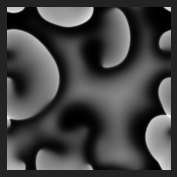

In [151]:
#visualize buffer
plt.subplots(figsize=(3,3))
plt.imshow(inVc[...,0],cmap='gray')
# plt.imshow(inmhjdfx[...,-6],cmap='gray')
# plt.imshow(dVcdt[...,0],cmap='gray')
plt.axis('off')
plt.show()

In [136]:
#NOPE: pickles cause security threats
# #txt's are >500MB even after rounding...  try to pickle it!
# import numpy
# import pickle
# arr = txt#numpy.array([[1, 2], [3, 4]])
# pickle.dump(arr, open("sample.pkl", "w"))

In [137]:
get_one_step_explicit_synchronous_splitting

<function lib.controller.controller_LR.get_one_step_explicit_synchronous_splitting(nb_dir, dt=0.01, width=200, height=200, ds=5.0, diffCoef=0.001, Cm=1.0, **kwargs)>

In [138]:
100/3

33.333333333333336

__NOTE__ if I set the max buffer for simulation to size 1800x1800, then the largest integration by $t=100$ ms takes 100 minutes
- at 300x300, integration by $t=100$ ms takes 3 minutes
- it is BOO that 4 sig figs is enough to restart SDC

In [150]:
# __qualname__
# __module__
get_compute_all_spiral_tips.__dir__

<function function.__dir__()>

In [133]:
# array1=inVc[...,0]
# array2=dVcdt[...,0]
# level1=-50.
# level2=0.
# retval=find_intersections(array1,array2,level1,level2)
# x_lst=retval[0]
# y_lst=retval[1]
# n_tips=len(x_lst)

In [134]:
dict_out_lst=[]
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)

img=inVc[...,0]
dimgdt=dVcdt[...,0]
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)

#save tip data
n_tips=dict_out['n']
# n_tips_lst.append(n_tips)
# t_lst.append(t)
dict_out_lst.append(dict_out)

In [154]:
get_txt

<function lib.utils.get_txt.get_txt(txt_id1, txt_id2, width, height, worker_dir)>

In [155]:
txt.shape

(100, 100, 18)

In [156]:
!ls ic


ic1800x1800.txt


In [4]:
# from lib.routines import generate_tip_logs_from_ic

In [6]:
# generate_tip_logs_from_ic((initial_condition_dir, h, tmax, V_threshold, dsdpixel, tmin_early_stopping, save_every_n_frames, round_output_decimals, printing, logging, asserting, saving, data_dir_log, completed_ic_dir, print_log_dir, Ca_i_initial=0.0002, Vmax=45.0, Vmin=-75.0, **kwargs))

In [166]:
tmax=30000
np.arange(t,tmax,dt)

array([  100.1,   100.2,   100.3, ..., 29999.7, 29999.8, 29999.9])

In [ ]:
# def get_one_step_map(nb_dir,dt,dsdpixel,width,height,**kwargs):
# 	'''Example Usage:
# 	dt, one_step_map= get_one_step_map(nb_dir,dt,dsdpixel,width,height,**kwargs)
# 	'''
# 	#make null stimulus
# 	ds=dsdpixel*width
# 	txt_Istim=np.zeros(shape=(width,height,1), dtype=np.float64, order='C')
# 	dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

# 	#get one step map
# 	# txt_Istim=txt_Istim_none.copy()
# 	@njit
# 	def one_step_map(txt):
# 		kernelA(txt,txt_Istim)
# 		kernelB(txt,txt_Istim)

# 	return dt, one_step_map


## test the routine for generating the raw tip locations

In [45]:
from lib.utils import get_txt
txt=get_txt(3,1,200,200,nb_dir)
width,height,chno=txt.shape
dt=0.1
dsdpixel=0.025


In [ ]:

# from lib.model.LR_model_optimized_w_Istim import *
# dt,one_step_map=get_one_step_map(nb_dir, dt, dsdpixel, width, height)#, **kwargs)
# # dt, one_step_map= get_one_step_map(nb_dir,dt,dsdpixel,width,height)#,**kwargs)
# # txt_Istim_none=np.zeros(shape=(width,height,1), dtype=np.float64, order='C')
# beep(4)

In [49]:
from lib.routines.return_tip_log import return_tips_from_txt

#TODO: test return_tips_from_txt
df=return_tips_from_txt(
    txt=txt,
    h=0.1,
    tmax=200,
    V_threshold=-50,
    dsdpixel=0.025,
    tmin_early_stopping=100,
    save_every_n_frames=10,
    round_output_decimals=5)#,
#     **kwargs)
beep(4)
if df is not None:
    df.head()

In [47]:
# from lib.controller.controller_LR import *#get_one_step_explicit_synchronous_splitting as get_one_step
# dt, one_step_map = get_one_step_map(nb_dir,dt)#,**kwargs)#,dsdpixel,width,height,**kwargs)
# # kwargs.update({'width':width,'height':height})
# beep(4)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy
0,100.099998,6.0,55.130756,54.403488,3.329384,-1.345129,0.387161,1.619202
1,100.099998,6.0,89.659927,198.959747,0.655068,1.155287,-3.587617,3.067755
2,100.099998,6.0,124.662659,135.860367,3.402744,-1.213299,0.731505,1.245643
3,100.099998,6.0,130.474915,192.458054,-3.619230,4.126926,-0.090589,1.742223
4,100.099998,6.0,175.741348,98.518990,-3.682238,9.355987,1.656552,-0.177009


In [48]:
# t=0.
# txt_Istim_none=np.zeros(shape=(width,height), dtype=np.float64, order='C')
# while (t<1):
#     one_step_map(txt,txt_Istim_none)
#     t+=dt
# t=
np.around(1.0999999999,decimals=1)

1.1

In [41]:
df
# del txt

[{'t': 100.1,
  'n': 0,
  'x': [],
  'y': [],
  'grad_ux': [],
  'grad_uy': [],
  'grad_vx': [],
  'grad_vy': []},
 {'t': 100.1,
  'n': 0,
  'x': [],
  'y': [],
  'grad_ux': [],
  'grad_uy': [],
  'grad_vx': [],
  'grad_vy': []}]

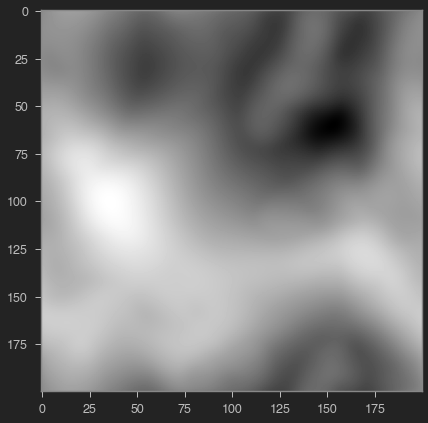

In [42]:
plt.imshow(txt[...,0],cmap='gray')

In [41]:
h=0.1;
tmax=.15;
V_threshold=-50;
dsdpixel=0.025;
tmin_early_stopping=100;
save_every_n_frames=40;
round_output_decimals=5

<function lib.model.LR_model_optimized_w_Istim.get_one_step_map(nb_dir, dt, dsdpixel, width, height, **kwargs)>

In [33]:
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
inVc, outVc, inmhjdfx, outmhjdfx, dVcdt=unstack_txt(txt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=-50,level2=0)#,width=width,height=height)


In [34]:
dict_out

{'t': 1.0999999999999999,
 'n': 4,
 'x': [6.6037284059272325,
  53.77505578448423,
  88.98562067122863,
  156.43785846766738],
 'y': [134.9644903243535,
  6.817953697053323,
  181.2629400278373,
  136.78188481022974],
 'grad_ux': [-1.2717153522847677,
  1.1169882323252092,
  -3.968908499524995,
  1.9062652521708012],
 'grad_uy': [1.1015159617289891,
  0.10155537228647084,
  3.4366304009402504,
  -0.03487453700108726],
 'grad_vx': [-0.1752555161004705,
  1.1680771067902143,
  72.52565021952002,
  1.3366239728162408],
 'grad_vy': [1.0593579940934184,
  -0.4966502497368661,
  -34.11313138505005,
  0.611902748657375]}

In [69]:
def return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, use_cache=True, **kwargs):
    '''df is a pandas.DataFrame containing the tip log results.'''
    # generate_track_tips_pbc
    df.drop_duplicates(subset=['t','x','y'],keep='first',inplace=True)
    #,ignore_index=True)
    df = compute_track_tips_pbc(df, mem, sr, width, height)#,**kwargs)
    # unwrap_trajectories
    pid_lst = sorted(set(df.particle.values))
    df = pd.concat([unwrap_traj_and_center(df[df.particle==pid], width, height, DS) for pid in pid_lst])
    return df


In [55]:
# 	unwrapped_fn=log_to_unwrapped_trajectory(log_dir, use_cache=True,width=width, height=height,
# 											 sr=sr, mem=mem)
from lib import *

In [64]:
mem=0;sr=width*2;DS=dsdpixel
# generate_track_tips_pbc
df.drop_duplicates(subset=['t','x','y'],keep='first',inplace=True)#,ignore_index=True)
df = compute_track_tips_pbc(df, mem, sr, width, height)#,**kwargs)
# unwrap_trajectories
pid_lst = sorted(set(df.particle.values))
df = pd.concat([unwrap_traj_and_center(df[df.particle==pid], width, height, DS) for pid in pid_lst])
# df = pd.concat([unwrap_traj_and_center(df[df.particle==pid], width, height, DS, **kwargs) for pid in pid_lst])

Frame 99: 2 trajectories present.


In [71]:
df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, use_cache=True)#, **kwargs)


Frame 99: 2 trajectories present.


In [75]:
def return_longest_trajectories(df, width, height, dsdpixel, n_tips = 1, DT = 2., 
                                round_t_to_n_digits=0, jump_thresh=20., **kwargs):
    DS=dsdpixel
    if n_tips==1:
        df.reset_index(inplace=True)
        try:
            s = df.groupby('particle').t.count()
        except KeyError as e:#("KeyError") as e:
            # print(e)
            print( f"\t trial that failed: {input_file_name.split('/')[-1]}")
            return None
        s = s.sort_values(ascending=True)
        pid_longest_lst = list(s.index.values)#[:n_tips])
        pid=pid_longest_lst.pop()
        std_diffx=df[(df.particle==pid)].x.diff().dropna().std()
        boo=False
        if std_diffx:#.diff().dropna().x.std
            if std_diffx>0:
                boo=True
        while not boo:
            pid=pid_longest_lst.pop()
            std_diffx=df[(df.particle==pid)].x.diff().dropna().std()
            boo=False
            if std_diffx:#.diff().dropna().x.std
                if std_diffx>0:
                    boo=True
        pid_longest_lst=[pid]
    else:
        try:
            s = df.groupby('particle').t.count()
        except KeyError as e:#("KeyError") as e:
            # print(e)
            print( f"\t trial that failed: {input_file_name.split('/')[-1]}")
            return None
        s = s.sort_values(ascending=False)
        pid_longest_lst = list(s.index.values[:n_tips])
    #     df_traj = pd.concat([df[df.particle==pid] for pid in pid_longest_lst])

    #truncate trajectories to their first apparent jump (pbc jumps should have been removed already)
    df_lst = []
    for pid in  pid_longest_lst:#[2:]:
        d = df[(df.particle==pid)].copy()
        x_values, y_values = d[['x','y']].values.T
        index_values = d.index.values.T
        jump_index_array, spd_lst = find_jumps(x_values,y_values,width,height, DS=DS,DT=DT, jump_thresh=jump_thresh, **kwargs)#.25)
        if len(jump_index_array)>0:
            ji = jump_index_array[0]
            d.drop(index=index_values[ji:], inplace=True)
        df_lst.append(d)
    df_traj = pd.concat(df_lst)

    #round trajectory times to remove machine noise from floating point arithmatic
    df_traj['t'] = df_traj.t.round(round_t_to_n_digits)
    # df_traj['x'] = df_traj.x.round(6)
    # df_traj['y'] = df_traj.y.round(6)
    df_traj['grad_ux'] = df_traj.grad_ux.round(5)
    df_traj['grad_uy'] = df_traj.grad_uy.round(5)
    df_traj['grad_vx'] = df_traj.grad_vx.round(5)
    df_traj['grad_vy'] = df_traj.grad_vy.round(5)
    #     assert ( (np.array(sorted(set(df_traj['particle'].values)))==np.array(sorted(pid_longest_lst))).all())
    return df_traj


In [77]:
#print the longest lasting trajecotry that moves
df=return_longest_trajectories(df, width, height, dsdpixel, n_tips = 1, DT = 2., 
                                round_t_to_n_digits=0, jump_thresh=20.)#, **kwargs)
print(df.to_string())

In [79]:
print (df)

     index      t    n          x          y   grad_ux   grad_uy  grad_vx  \
178     15  101.0  8.0   0.000000   0.000000  15.86848 -17.98485  0.61015   
179     23  102.0  8.0   0.965942   0.814529 -13.65763  19.71640 -0.43366   
180     31  103.0  8.0   0.983719   0.932159   4.03381  -2.86756  0.47805   
181     39  104.0  8.0   1.855469   1.814362   4.96274  -4.04460  0.50298   
182     47  105.0  8.0   2.620377   2.697678   9.93495 -10.35681  0.15275   
..     ...    ...  ...        ...        ...       ...       ...      ...   
265    851  188.0  6.0  41.336914  21.517761   3.90101  -1.63847  2.49240   
266    857  189.0  6.0  42.323730  23.783646   3.86171  -1.58725  2.32094   
267    863  190.0  6.0  43.153793  26.149612   3.20346  -0.97219  2.12443   
268    869  191.0  6.0  44.016159  29.829742   2.69560  -0.49947  1.67833   
269    875  192.0  6.0  44.252579  33.727249   2.05678   0.08330  1.71725   

     grad_vy  frame  particle  
178  1.49627      1         5  
179  2.8270

In [86]:
# print(df.to_string())
import random

In [117]:
width_in=1800
max_area=900**2 #sqpixels
min_area=200**2 #sqpixels
L=int(np.floor(np.sqrt(100*random.randint(min_area/100,max_area/100))))#UNCOMMENT_HERE
# L=int(np.floor(np.sqrt(random.uniform(min_area,max_area))))#COMMENT_HERE
L

424

In [121]:
# (min_area*0.025**2,max_area*0.025**2)
unwrap_traj_and_center

<function lib.routines.compute_msd.unwrap_traj_and_center(d, width, height, DS, **kwargs)>

The above max_area and min_area give a range of domain sizes from 25cm^2 to 505cm^2

In [124]:
txt=get_txt(0,0,100,100,nb_dir)

ValueError: could not convert string to float: '<!DOCTYPE'

# generate spiral waves for FK model from scratch, as above

# Create Initial Conditions That Result in Spiral Defect Chaos for the Fenton-Karma model
Tim Tyree<br>
2.9.2021

## initialize a 600x600 square computational domain with the correct number of channels and as repolarized excitable myocardial tissue

In [84]:
# #fast, local, cythonic tip logging for FK model
# from lib.routines.kwargs_cy import get_kwargs
# from lib.routines.generate_tip_logs_cy import generate_tip_logs_from_ic
# # get_kwargs
# def run_routine(ic):
#     kwargs = get_kwargs(ic,ds=ds, results_folder=results_folder,param_fn=param_fn)
#     kwargs['V_threshold'] = 0.4
#     kwargs['ds']=ds
#     kwargs['h']=0.025# kwargs['h']=0.01 for ds_1_param_set_8 for stability
    
#     kwargs = generate_tip_logs_from_ic(ic, **kwargs)
#     return True

In [85]:
#one_step_method
# from inspect import getsource
# print(getsource(generate_tip_logs_from_ic))

In [128]:
def get_blank_txt_FK(width,height,V_initial=0.,f_initial = 0.,s_initial=1.):#1.98799363e-02, s_initial=4.66179786e-01):
    zero=np.zeros(shape=(width,height,3), dtype=np.float64, order='C')
    #allocate memory to texture
    txt=zero.copy()
    txt[...,0]+=V_initial
    txt[...,1]+=f_initial
    txt[...,2]+=s_initial
    return txt

In [177]:
width=600;height=600
dsdpixel=0.025
V_threshold = 0.4
h=0.025# kwarg
param_fn = 'param_set_8.json'
param_dir = os.path.join(nb_dir,'lib/model')
param_dict = json.load(open(os.path.join(param_dir,param_fn)))
get_time_step=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
time_step=fetch_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)

# width=600
# height=600
# ds=15.0
# dt,one_step_map=get_one_step_map(nb_dir,dt=0.1,width=width,height=height,ds=ds,diffCoef=0.001,dsdpixel=ds/width,Cm=1.0,)
txt=get_blank_txt_FK(width,height)

zero_txt=np.zeros_like(txt)
Cm=1.
def one_step_map(txt,txt_Istim):
    time_step(txt, h, zero_txt)
    txt[...,0]-=h*txt_Istim/Cm

In [131]:
# #forward Euler integration in time
# tf=250;
# nsteps=tf/h
# for stepno in range(500):
#     time_step(txt, h, zero_txt)
# txt

In [132]:
level1=V_threshold;level2=0.
#take measurements once
#compute as discrete flow map dtxt_dt
dtxt_dt = zero_txt.copy()
get_time_step(txt, dtxt_dt)

#compute the images used to find isosurfaces
img    = txt[...,0]
dimgdt = dtxt_dt[...,0]

# find_intersections
retval = find_intersections(img,dimgdt,level1,level2)
lst_values_x,lst_values_y,lst_values_theta, lst_values_grad_ux, lst_values_grad_uy, lst_values_grad_vx, lst_values_grad_vy = retval
x_values = np.array(lst_values_x)
y_values = np.array(lst_values_y)
print(x_values)

[]


In [133]:
#(not terribly useful) get the forward integrate kernel
# forward_integrate_kernel= get_forward_integrate_kernel(nb_dir,dt,width,height,ds,diffCoef=0.001,Cm=1.)

### DONE: test - time step a number of times and verify that nothing happens/nothing spikes spontaneously

In [134]:
#forward Euler integration in time
tf=10;
txt_prv=txt.copy()
nsteps=int(tf/h)
for stepno in range(nsteps):
    time_step(txt, h, zero_txt)
# for n in range(50):
#     one_step_map(txt,txt_Istim_none)
txt_nxt=txt.copy()

In [135]:
delta_txt=txt_nxt-txt_prv

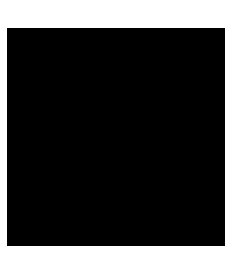

In [136]:
chnl=2
img=delta_txt[...,chnl]
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}',c='w',fontsize=22)
plt.show()

In [137]:
print('max absolute differences between input and output, by channel')
for chnl in range(3):
    img=delta_txt[...,chnl]
    print(np.max(np.abs(img)))
beep(2)

max absolute differences between input and output, by channel
9.832903127898837e-09
0.007968164526547571
0.0


0

## define txt_Istim textures that give a line stimulus of constant electric flux


In [178]:
chnlno=3#2+2+6+6+2
# txt= get_blank_txt_LR(width,height,V_initial=-85.,Ca_i_initial = 2*10**-4)
width=600;height=600
zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
# zero_c6=np.zeros(shape=(width,height,6), dtype=np.float64, order='C')
print(f"# of channels is {chnlno}.")

mag=-1.
txt_Istim=zero_c2[...,0].copy()
txt_Istim[:,:5]=mag
txt_Istim_left=txt_Istim.copy()

# mag=-1
txt_Istim=zero_c2[...,0].copy()
txt_Istim[300:305,:]=mag
txt_Istim_top=txt_Istim.copy()

txt_Istim_none=zero_c2[...,0].copy()

# of channels is 3.


In [179]:
#make initialization conditions for a semicircular stimulus on the left
deg = 45
x0 = 600/4
y0 = 600/2
# mag=-1
from lib.controller.draw import *

txt_Istim=get_semicircle(zero_c2,deg,x0,y0)
txt_Istim*=mag
txt_Istim_semi=txt_Istim.copy()

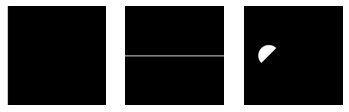

In [180]:
fig,axs=plt.subplots(ncols=3,figsize=(6,9))
ax=axs[0]
ax.imshow(-txt_Istim_left,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
ax=axs[1]
ax.imshow(-txt_Istim_top,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
ax=axs[2]
ax.imshow(-txt_Istim_semi,cmap='gray')#,vmin=-10, vmax=15)
ax.axis('off')
plt.show()

## (success!) Generate a stable spiral wave using cross-stimulation for the FK model

In [181]:
from lib.utils import printProgressBar

In [189]:
ic_folder=f"{nb_dir}/Data/initial-conditions-suite-4-FK"
if not os.path.exists(ic_folder):
    os.mkdir(ic_folder)

In [183]:
width=600 #width of domain in pixels
height=600 #height of domain in pixels
ds=15.0 #width of domain in centimeters

#initialize txt
# V_initial=-85.
# Ca_i_initial = 2*10**-4
# txt=get_blank_txt_LR(width,height,V_initial=-84.66,Ca_i_initial = 1.45E-007)
txt=get_blank_txt_FK(width,height)
t=0.
dt=h
#get time steps
# from lib.model.LR_model_optimized_w_Istim import *
#get the onestep kernels
# dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [184]:
#stimulate on the left
tf=10.
num_steps=int(tf/dt)
txt_Istim=txt_Istim_left.copy()
update_every=10
step_count=0
for n in range(num_steps):
#     kernelA(txt,txt_Istim)
#     kernelB(txt,txt_Istim)
    one_step_map(txt,txt_Istim)
    t+=dt
    step_count+=1
    if step_count%update_every==0:
        printProgressBar(step_count,num_steps)
txt_a1=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
the final time is t = 10.0 ms.



6.170427341490393


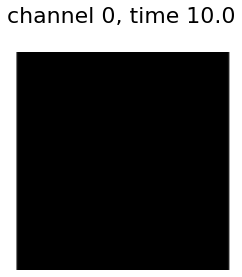

In [185]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt_a1[...,chnl]
plt.imshow(img,cmap='gray',vmin=0, vmax=1)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [186]:
#integrate without stimulation
# txt=txt_a.copy()
tf=200
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=10
step_count=0
for n in range(num_steps):
#     kernelA(txt,txt_Istim)
#     kernelB(txt,txt_Istim)
    one_step_map(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
        printProgressBar(step_count,num_steps)
txt_a2=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.9% 
the final time is t = 199.8 ms.



4.154293708714057e-05


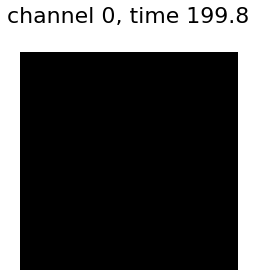

In [187]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
ta2=t#110
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=0, vmax=1)
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [190]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=ic_folder+"/txt_a2.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [92]:
# #load the buffer loaded
# t=200.
# img_fn=f'{nb_dir}/Data/initial-conditions-suite-4-FK/txt_a2.npz'
# txt=load_buffer(img_fn)[0]
# txt.shape

(600, 600, 18)

4.154293708714057e-05


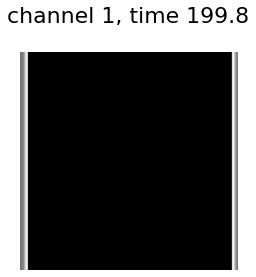

In [191]:
#Visualize the buffer (plain)
chnl=1
print(np.max(txt[...,0]))
ta2=t#110
img=txt[...,chnl]
if chnl==0:
    plt.imshow(img,cmap='gray',vmin=-10, vmax=15)
else:
    plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}, time {ta2:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()


In [ ]:
dt

In [192]:
#integrate without stimulation
# t=130
# txt=txt_a2.copy()
tf=75#150
num_steps=int((tf)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=1
step_count=0
for n in range(num_steps):
#     kernelA(txt,txt_Istim)
#     kernelB(txt,txt_Istim)
    one_step_map(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
        t+=dt*update_every
#         printProgressBar(step_count,num_steps)
txt_a3=txt.copy()
print(f"\nthe final time is t = {t:.1f} ms.\n")
# beep(1)



the final time is t = 274.7 ms.



In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
ta3=t#110
img=txt[...,chnl]
if chnl==0:
    plt.imshow(img,cmap='gray',vmin=0, vmax=1)
else:
    plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(f'channel {chnl}, time {ta3:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [103]:
# #define the top stimulation width (wag) and magnitude (mag)
# mag=-10#1.77#-10#-3.
# wag=5
# zero_c2=np.zeros(shape=(width,height,2), dtype=np.float64, order='C')
# txt_Istim=zero_c2[...,0].copy()
# txt_Istim[300:300+wag,:300]=mag
# txt_Istim_top=txt_Istim.copy()

In [104]:
# dt=0.01
# dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [194]:
#take 1000 time steps to 100ms, stimulating on the with a semicircle #top/horizontally
tf=10#.100#10
# t=130
# txt=txt_a3.copy()
# txt=txt_a2.copy()
num_steps=int(tf/dt)
txt_Istim=txt_Istim_semi.copy()#txt_Istim_top.copy()
# txt_Istim=txt_Istim_top.copy()
update_every=100
step_count=0
for n in range(num_steps):
#     kernelA(txt,txt_Istim)
#     kernelB(txt,txt_Istim)
    one_step_map(txt,txt_Istim)
#     step_count+=1
#     if step_count%update_every==0:
t+=dt*num_steps#update_every
#         printProgressBar(step_count,num_steps)
print(f"\nthe final time is t = {t:.1f} ms.")
txt_b=txt.copy()
# beep(1)


the final time is t = 284.7 ms.


1.0397730602418414


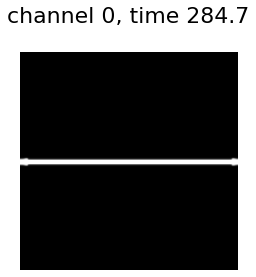

In [201]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt_b[...,chnl]
plt.imshow(img,cmap='gray',vmin=0, vmax=1)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [107]:
# dt=0.1
# dt, kernelA, kernelB=get_one_step_explicit_synchronous_splitting_w_Istim_kernel(nb_dir,dt,width,height,ds)

In [108]:
# beep(7)

0

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf= 1200
t = 284.7
txt=txt_b.copy()
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
#     kernelA(txt,txt_Istim)
#     kernelB(txt,txt_Istim)
    one_step_map(txt,txt_Istim)
    step_count+=1
    if step_count%update_every==0:
#         t+=dt*update_every
        #compute dict_out
        printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(1)

txt_1=txt.copy()

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(t)
img=txt_1[...,chnl]
plt.imshow(img,cmap='gray',vmin=0, vmax=1)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-4-FK/txt_1.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])
print(t)
beep(10)

In [ ]:
#load the buffer loaded
# t=385.
img_fn=f'{nb_dir}/Data/initial-conditions-suite-4-FK/txt_1.npz'
txt=load_buffer(img_fn)[0]
txt.shape

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=10
# txt=txt_b.copy()
num_steps=int(tf/dt)
txt_Istim=txt_Istim_none.copy()
update_every=100
step_count=0
for n in range(num_steps):
#     kernelA(txt,txt_Istim)
#     kernelB(txt,txt_Istim)
    one_step_map(txt,txt_Istim)
    step_count+=1
#     if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
#         printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(1)

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=0, vmax=1)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-4-FK/ic600x600_tt/ic001.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [ ]:
beep(10)

In [ ]:
#take 10000 time steps forward 1 sec without stimulation
tf=2000
# txt=txt_b.copy()
num_steps=int((tf-t)/dt)
txt_Istim=txt_Istim_none.copy()
update_every=50
step_count=0
for n in range(num_steps):
    kernelA(txt,txt_Istim)
    kernelB(txt,txt_Istim)
    step_count+=1
#     if step_count%update_every==0:
#         t+=dt*update_every
#         compute dict_out
#         printProgressBar(step_count,num_steps)
t+=dt*num_steps#update_every
print(f"\nthe final time is t = {t} ms.")
beep(10)

In [ ]:
#Visualize the buffer (plain)
chnl=0
print(np.max(txt[...,0]))
img=txt[...,chnl]
plt.imshow(img,cmap='gray',vmin=-80, vmax=15)
plt.axis('off')
plt.title(f'channel {chnl}, time {t:.1f}\n',c='k',fontsize=22)#c='w',fontsize=22)
plt.show()

In [ ]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/initial-conditions-suite-4-FK/ic600x600_tt/ic001.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])
print(t)

## observe apparent spiral tips

### Show all spiral tips present


In [ ]:
#compute all spiral tips present
V_threshold=25.#mV
level1=V_threshold
# theta_threshold=0.
level2=0.
#take the first step
one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
t+=dt
img=inVc[...,0]
dimgdt=dVcdt[...,0]
width=200;height=200
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2,width=width,height=height)
dict_out_instantaneous=dict_out
print(np.max(inVc[...,0]))

In [ ]:
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['v'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
plt.show(fig)

In [ ]:
#save texture at this time t
save=False
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/test_data/test_txt_LR_euler_t_{int(t)}.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

# TODO: test that loading an ic keeps spiral tips when changing parameter sets

# (briefly) see/test if I can use the LR ic's to start SDC using any FK time step
... (nope)

project V (mV) onto V (unitless), j onto f , and j,f,w onto s.

In [2]:
from lib.utils import get_txt

In [27]:
#TODO: load a small txt from LR database
txt_id1=0
txt_id2=0 
width=200
height=200
worker_dir=nb_dir
txt=get_txt(txt_id1, txt_id2, width, height, worker_dir)#, **kwargs)
txt_lr=txt.copy()

In [28]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/test_data/test_txt_LR.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])
print(save_img_fn)

/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/test_txt_LR.npz


In [33]:
from lib.utils import load_buffer
# txt=load_buffer(save_img_fn)
img_fn="/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/test_txt_LR.npz"
txt=np.load(save_img_fn)['arr_0'][0]

In [34]:
inVc, outVc, inmhjdfx, outmhjdfx, dVcdt=unstack_txt(txt_lr)
V=inVc[...,0]
Vmn=np.min(V)
Vmx=0
V=(V+Vmn)/(Vmx-Vmn)
F=0.6*inmhjdfx[...,1]#h
# F=0.6*inmhjdfx[...,2]#j #didn't work
S=1-0.5*(1-inmhjdfx[...,4])#f 
txt=np.stack([V,F,S],axis=-1)
txt.shape

(200, 200, 3)

In [35]:
#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=f"{nb_dir}/Data/test_data/test_txt_FK_from_LR.npz"
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])
print(save_img_fn)

/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/test_txt_FK_from_LR.npz


In [36]:
from lib.utils import load_buffer
# txt=load_buffer(save_img_fn)
txt=np.load(save_img_fn)['arr_0'][0]

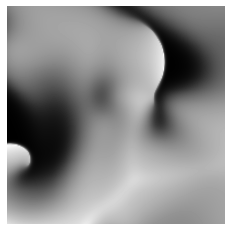

In [38]:
plt.imshow(txt[...,0],cmap='gray')
plt.axis('off')
plt.show()


In [39]:
# width=200;height=200
dsdpixel=0.025
V_threshold = 0.4
h=0.01# kwarg
param_fn = 'param_set_8.json'
param_dir = os.path.join(nb_dir,'lib/model')
param_dict = json.load(open(os.path.join(param_dir,param_fn)))
get_time_step=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
time_step=fetch_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)

# ds=15.0
# dt,one_step_map=get_one_step_map(nb_dir,dt=0.1,width=width,height=height,ds=ds,diffCoef=0.001,dsdpixel=ds/width,Cm=1.0,)
# txt=get_blank_txt_FK(width,height,V_initial=0.,f_initial = 0., s_initial=0.)
zero_txt=np.zeros_like(txt)
def one_step_map(txt):
    time_step(txt, h, zero_txt)

In [40]:
#forward Euler integration in time
for stepno in range(10000):
    time_step(txt, h, zero_txt)


In [41]:
beep(3)

0

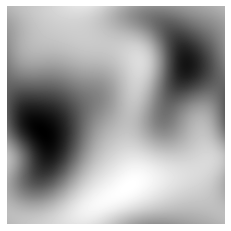

0

In [42]:
plt.imshow(txt[...,0],cmap='gray')
plt.axis('off')
plt.show()
beep(2)

In [44]:
np.min(txt[...,0])

-0.0006366016600089458